In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./fish_toxicity.csv"
FEATURES = [
	"cic0",
	"sm1_dz",
	"gats1i",
	"ndsch",
	"ndssc",
	"mlogp"
]
LABEL = "lc50"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"cic0": "float32",
	"sm1_dz": "float32",
	"gats1i": "float32",
	"ndsch": "float32",
	"ndssc": "float32",
	"mlogp": "float32",
	"lc50": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['cic0', 'sm1_dz', 'gats1i', 'ndsch', 'ndssc', 'mlogp', 'lc50']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [5]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, delimiter=";")
data.head()

,cic0,sm1_dz,gats1i,ndsch,ndssc,mlogp,lc50
0,3.260,0.829,1.676,0.0,1.0,1.453,3.770
1,2.189,0.580,0.863,0.0,0.0,1.348,3.115
2,2.125,0.638,0.831,0.0,0.0,1.348,3.531
3,3.027,0.331,1.472,1.0,0.0,1.807,3.510
4,2.094,0.827,0.860,0.0,0.0,1.886,5.390


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cic0    908 non-null    float32
 1   sm1_dz  908 non-null    float32
 2   gats1i  908 non-null    float32
 3   ndsch   908 non-null    float32
 4   ndssc   908 non-null    float32
 5   mlogp   908 non-null    float32
 6   lc50    908 non-null    float32
dtypes: float32(7)
memory usage: 25.0 KB


In [7]:
# Missing values
data = data.dropna()
data.isna().sum()

cic0      0
sm1_dz    0
gats1i    0
ndsch     0
ndssc     0
mlogp     0
lc50      0
dtype: int64

In [8]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,cic0,sm1_dz,gats1i,ndsch,ndssc,mlogp,lc50
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,908.000000
mean,-1.260363e-08,1.890544e-08,4.201208e-09,-2.100604e-08,-1.890544e-08,-4.201208e-09,4.064431
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.455698
min,-2.952510e+00,-1.467618e+00,-2.277656e+00,-3.786352e-01,-5.642197e-01,-3.485978e+00,0.053000
25%,-7.293228e-01,-9.468617e-01,-8.699670e-01,-3.786352e-01,-5.642197e-01,-6.285191e-01,3.151750
50%,4.746922e-02,-1.365365e-01,-1.347206e-01,-3.786352e-01,-5.642197e-01,1.236732e-02,3.987500
75%,6.734022e-01,6.171594e-01,6.817266e-01,-3.786352e-01,5.974842e-01,6.951416e-01,4.907500
max,4.006859e+00,3.602169e+00,4.127045e+00,6.232918e+00,6.406003e+00,3.075776e+00,9.612000


In [9]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,cic0,sm1_dz,gats1i,ndsch,ndssc,mlogp,lc50
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,908.000000
mean,-1.260363e-08,1.890544e-08,4.201208e-09,-2.100604e-08,-1.890544e-08,-4.201208e-09,0.419650
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,0.152286
min,-2.952510e+00,-1.467618e+00,-2.277656e+00,-3.786352e-01,-5.642197e-01,-3.485978e+00,0.000000
25%,-7.293228e-01,-9.468617e-01,-8.699670e-01,-3.786352e-01,-5.642197e-01,-6.285191e-01,0.324171
50%,4.746922e-02,-1.365365e-01,-1.347206e-01,-3.786352e-01,-5.642197e-01,1.236732e-02,0.411602
75%,6.734022e-01,6.171594e-01,6.817266e-01,-3.786352e-01,5.974842e-01,6.951416e-01,0.507846
max,4.006859e+00,3.602169e+00,4.127045e+00,6.232918e+00,6.406003e+00,3.075776e+00,1.000000


In [9]:
# # Set categories
# for column in COLUMNS:
# 	if data[column].dtype.name == "category":
# 		labelencoder = preprocessing.LabelEncoder()
# 		data[column] = labelencoder.fit_transform(data[column])
# 		categories=data[column].unique()
# 		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
# 		print(data[column].cat.categories.tolist())

[6, 7, 5, 4, 3, 1, 8, 0, 2]
[3, 2, 4, 1, 0, 6, 5]
[7, 10, 1, 11, 0, 6, 5, 3, 4, 2, 8, 9]
[0, 5, 2, 3, 1, 6, 4]


In [10]:
data = data.astype(dtype=DTYPE)
data.dtypes

cic0      float32
sm1_dz    float32
gats1i    float32
ndsch     float32
ndssc     float32
mlogp     float32
lc50      float32
dtype: object

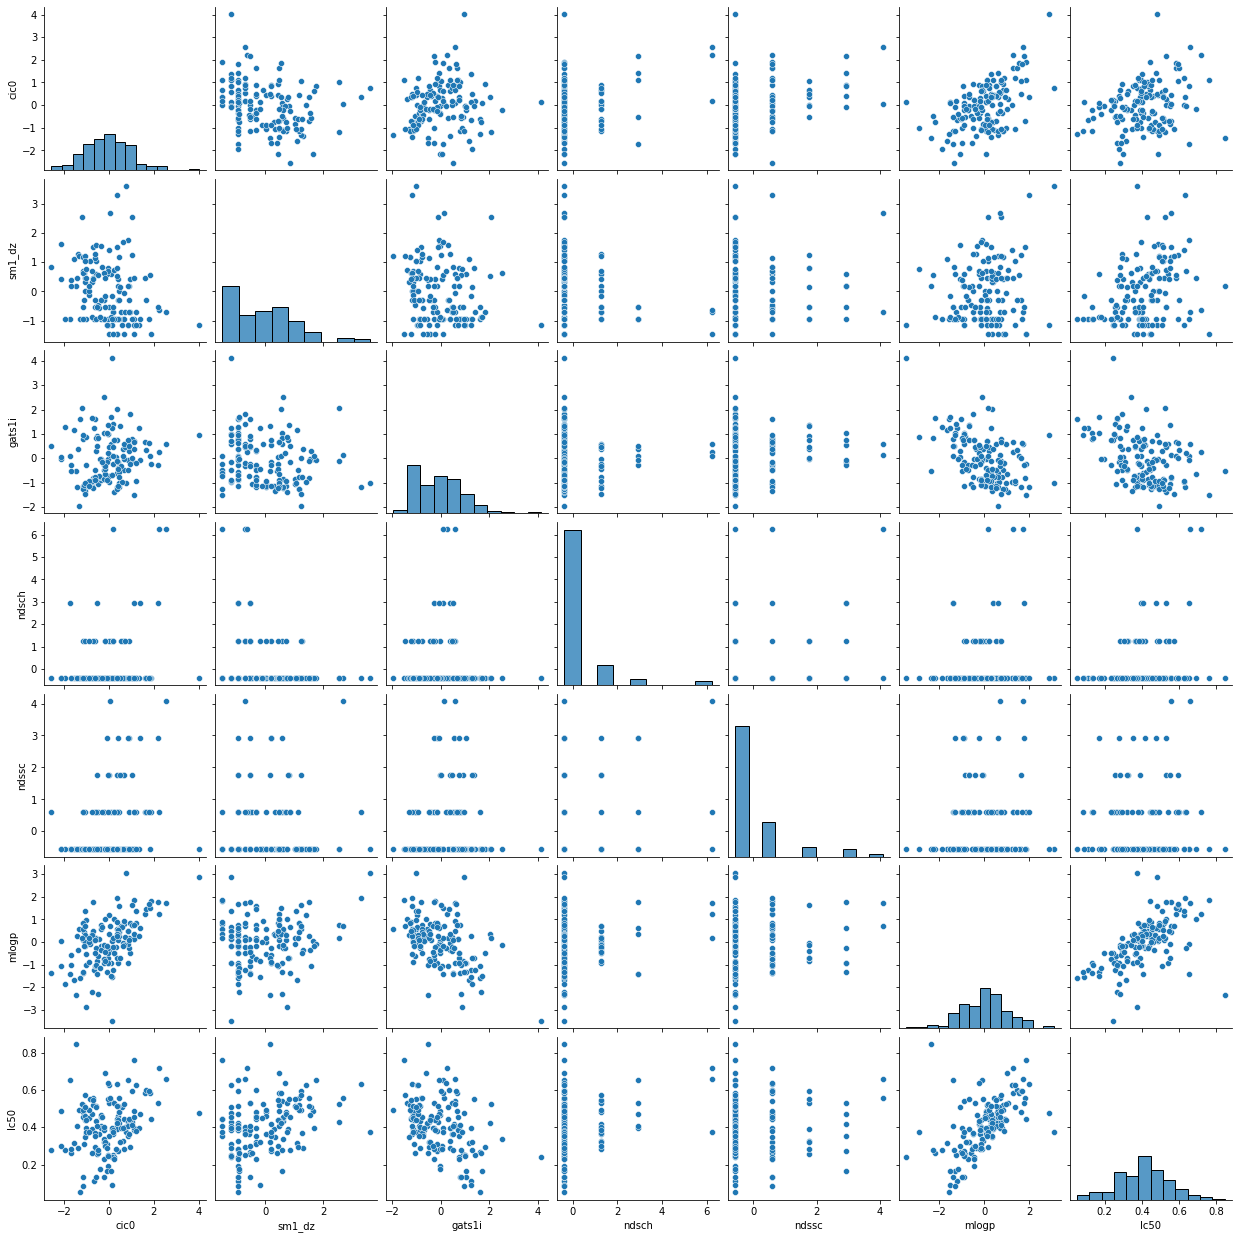

In [11]:
sns.pairplot(data.sample(n=150, random_state=1))

In [12]:
target = data.pop(LABEL)
target

0      0.388848
1      0.320326
2      0.363846
3      0.361649
4      0.558322
         ...   
903    0.319699
904    0.417094
905    0.498483
906    0.550685
907    0.852390
Name: lc50, Length: 908, dtype: float32

In [13]:
data = pd.get_dummies(data, dtype="float32")
data

,cic0,sm1_dz,gats1i,ndsch,ndssc,mlogp
0,0.478873,0.468288,0.970369,-0.378635,0.597484,-0.458175
1,-0.938408,-0.113184,-1.092634,-0.378635,-0.564220,-0.531478
2,-1.023101,0.022259,-1.173835,-0.378635,-0.564220,-0.531478
3,0.170538,-0.694657,0.452715,1.274253,-0.564220,-0.211035
4,-1.064124,0.463618,-1.100247,-0.378635,-0.564220,-0.155883
...,...,...,...,...,...,...
903,-0.128533,0.232430,2.366006,-0.378635,1.759188,-0.958736
904,0.997617,0.568703,-1.082484,2.927141,2.920892,1.308102
905,1.144506,0.671454,-1.054572,-0.378635,6.406003,0.564591
906,-0.088833,1.785359,-0.549605,-0.378635,0.597484,-0.840053


In [14]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)